In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities"
sys.path.append(path)
import plot_settings

In [2]:
data = np.genfromtxt(r'C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Arguments\ML\SN_v0\mu_z.txt', delimiter=' ')

In [3]:
z_sample  = data[:, 0]
mu_sample = data[:, 1]
dmu       = data[:, 2]

In [4]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import mean_squared_error

## Ridge Regularization

In [5]:
degrees = np.linspace(1, 15, 10, dtype=int)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
z_train, z_test, mu_train, mu_test, mu_err_train, mu_err_test = train_test_split(z_sample, mu_sample, dmu, test_size=0.1, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))

In [10]:
test_res, train_res = [], []

for deg in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree=deg),
        StandardScaler(),
        Ridge(alpha=0.1)
    )
    
    model.fit(z_train_scaled, mu_train)
    
    mu_pred_test = model.predict(z_test_scaled.reshape(-1, 1))
    test_mse = mean_squared_error(mu_test, mu_pred_test)
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    cv_train = cross_val_score(model, z_train.reshape(-1, 1), mu_train, cv=cv, scoring='neg_mean_squared_error')
    
    test_res.append(-test_mse)
    train_res.append(-cv_train.mean())


(0.0, 10.0)

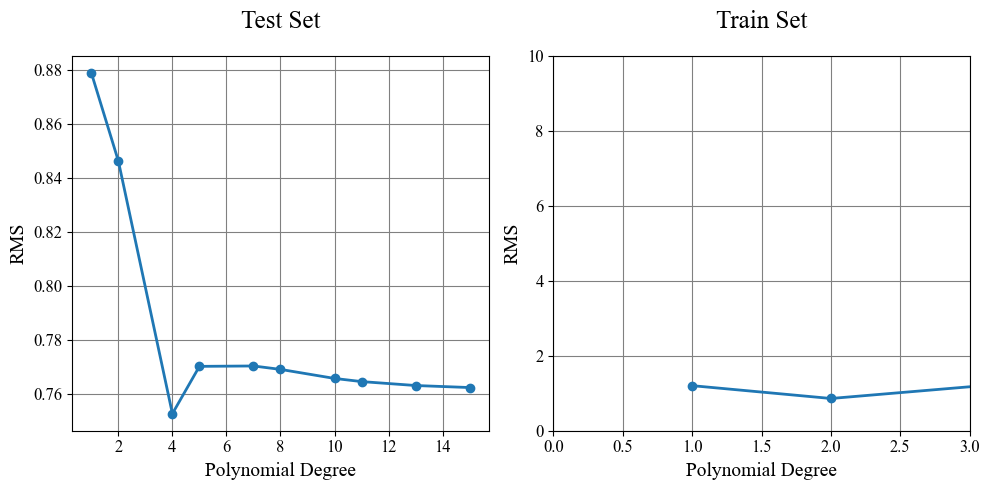

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(degrees, np.abs(test_res), label='Test RMS', marker='o')
ax[1].plot(degrees, np.abs(train_res), label='Train RMS', marker='o')
ax[0].set_xlabel('Polynomial Degree')
ax[1].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('RMS')
ax[1].set_ylabel('RMS')
ax[0].set_title('Test Set')
ax[1].set_title('Train Set')
ax[1].set_xlim(0, 3)
ax[1].set_ylim(0, 10)

Regularization changes things a bit.\
For what concernes the test set, it has a minimum at the 4th degree; it does not keep going up from the 4th degree becouse of regularization, which keeps the coefficients under control inserting a penalty.\
For what concernes the training set, regularization helps in controlling the orders of magnitude of the polinomial coefficients but does not change the lineshape of the error, which keeps going up after the second degree.